# TP 1. Introduction et premier problème de classification



Dans ce TP, on décrit les principaux problèmes de base en data science, et des éléments de méthodologie à adopter face aux problèmes "simples" de data science. On s'intéresse ensuite à un problème de classification : on veut prédire la note d'un vin en fonction de ses caractéristiques biochimiques. Le notebook suit plus ou moins librement l'énoncé du TD 1 du cours disponible ici : http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_enonce_cl_reg_anomaly.html#td2aenonceclreganomalyrst



## 1. Quelques bases de Machine Learning

*Disclaimer : ces rappels ne sont que des rappels pour faciliter le travail en TD et n'ont pas la prétention de se comparer à un vrai cours. Les notations mathématiques, par exemple, sont légèrement allégées pour mettre l'accent sur la partie vraiment "data science" pratique, qui est l'objet du cours. Des cours plus théoriques seront dispensés au second semestre de deuxième année et en troisième année, et l'objectif de ce cours est plutôt d'acquérir des bases algorithmiques et pratiques qui vous premettrons, en gros, de savoir faire un projet de data classique, un Kaggle, etc...* 

### 1.1 Apprentissage supervisé/non supervisé

En Machine Learning, on distingue principalement deux problèmes, selon les données que l'on possède :
 - le problème d'apprentissage **supervisé** : en apprentissage supervisé, on dispose d'un échantillon d'entraînement composé de $n$ couples $Z_i = (X_i, Y_i), i=1,...,n$ supposés iid de loi $\mathbb{P}$ inconnue. Les $X_i \in \mathcal{X}$ (généralement $\mathcal{X} = \mathbb{R}^p$) sont appelés des inputs du modèle, et les $Y_i \in \mathcal{Y}$ sont les outputs du modèle. 
 
 L'objectif du problème d'apprentissage est de trouver une fonction $g : \mathcal{X} \rightarrow \mathcal{Y}$ de prédiction, qui minimise une erreur moyenne de prédiction. Si, par exemple, on définit $l : \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$ une fonction de perte, telle que $l(y, y')$ quantifie à quel point on se trompe lorsque $g$ prédit $y'$ là où le vrai label était $y$; alors on veut que $g$ minimise: $$\mathbb{E}_{\mathbb{P}}[l(Y, g(X))] $$
 

 - le problème d'apprentissage **non supervisé** : en apprentissage non supervisé, on ne dispose pas lors de l'entraînement d'exemples $Y_i$. On détaillera moins ce type de problème dans un premier temps, dans la mesure où ils sont plus complexes et plus rares. 
 

Pour résumer, lorsque l'on fait de l'apprentissage supervisé, on possède une base de données annotée, "labellisée", souvent par un humain. L'objectif de l'algorithme est d'apprendre à reproduire, en les généralisant le plus possible, ces annotations humaines. En apprentissage non supervisé, on veut apprendre quelque chose des données, mais on ne s'appuie pas sur des annotations : l'algorithme n'a pas de supervision dans son apprentissage. 

Dans l'industrie, les problèmes classiques sont très souvent des problèmes supervisés. Cependant, le problème de l'apprentissage supervisé est le fait qu'il soit coûteux et difficile d'annoter des données. Pour pallier à ces défauts, en recherche, aussi bien en image qu'en texte, beaucoup de problèmes sont supervisés (c'est le cas des benchmarks classiques), mais utilisent des algorithmes pré-entraînés sur des tâches dites "self-supervised", qui permettent un plus haut niveau d'abstraction. Les tâches de self-supervision consistent à prendre comme "label", "annotation" d'apprentissage une partie des données en entrée. Pour une image, par exemple, on essayera de prédire les niveaux de couleurs RGB en fonction de l'image en noir et blanc. Pour un texte, on masquera aléatoirement certains mots de la phrase, que le modèle devra prédire en fonction des autres mots. Ce processus d'entraînement est peu coûteux : il n'y a aucune annotation à produire, il suffit simplement de prendre des photos tel quel puis de les passer en noir et blanc, ou de prendre un texte et d'effacer aléatoirement certains mots. Ensuite, on adapte le modèle à d'autres tâches supervisées (trouver les chats dans l'image par exemple), en fine-tunant le modèle pré-entraîné sur notre problème avec des données annotées. Cette technique requiert moins de données annotées et produit des performances supérieures aux algorithmes simplement supervisés. Si vous vous tournez vers le deep learning plus tard, ce concept de pré-entraînement sur une tâche self-supervised, et d'application à une tâche supervisée est fondamentale. 


### 1.2 Classification, régression

En apprentissage supevisé, on distingue deux sous problèmes, selon la nature de $\mathcal{Y}$. Lorsque $\mathcal{Y} = \mathbb{R}$, on dit que l'on est dans un problème de **régression**, et lorsque $\mathcal{Y}$ est discret (par exemple, $\mathcal{Y}=\{0, 1\}$), on dit que l'on est dans un problème de **classification**. 
 

Un petit rappel des distinctions faites jusqu'à maintenant :
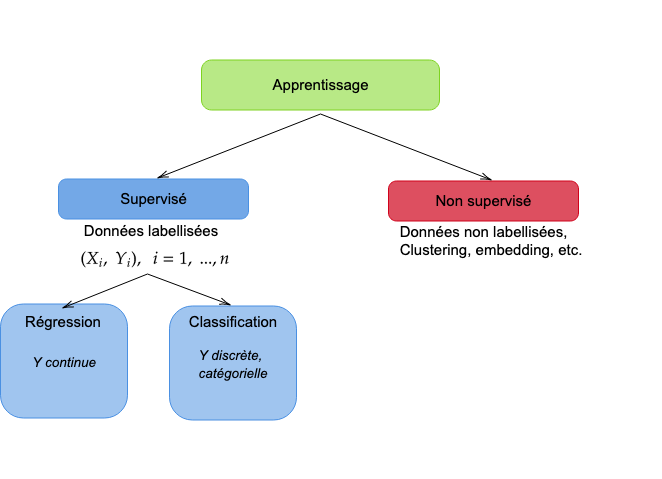



 
### 1.3 Entraînement d'un modèle en apprentissage supervisé

Les trois étapes suivantes sont les trois étapes principales de la méthodologie de base du data scientist : 

**1. Entraînement du modèle :** 

   On commence par diviser notre dataset (composé des $(X_i, Y_i)_{i=1, ..., n}$) en un dataset d'entraînement (qui contient par exemple 70% des lignes de la base), que l'on notera $(X_{\text{train}}, Y_{\text{train}})$, et un dataset de test, contenant le restant des lignes de la base, que l'on notera $(X_{\text{test}}, Y_{\text{test}})$.

   Diviser le dataset en *train* et *test* a un but précis : pouvoir tester sur $(X_{\text{test}}, Y_{\text{test}})$ les capacités de généralisation de notre modèle, qui aura été entraîné sur $(X_{\text{train}}, Y_{\text{train}})$ et n'aura jamais jamais vu $(X_{\text{test}}, Y_{\text{test}})$ au cours de son entraînement. 
   
   Pour un algorithme $f$, l'objectif  de la phase d'apprentissage est de trouver un ensemble de paramètres $\theta$
   tels que l'on prédise bien $Y$ à partir de $X$. On aimerait donc schématiquement que :
   $$Y \simeq f_{\alpha}(\theta, X) $$
   Ici, $\alpha$ symbolise les hyperparamètres du modèle. Les hyperparamètres sont des paramètres qui sont fixés pendant la phase d'entraînement classique, et qui définissent par exemple l'architecture du modèle : la profondeur des arbres, etc. On reviendra plus tard sur ces hyperparamètres, pour l'instant, on ne s'occupe que de $\theta$ : ce sont les seuls que l'on considère variables à ce stade.
   
   Notre objectif est donc le suivant : trouver $\hat{\theta}$ tel que $$\hat{\theta} \in \arg \underset{\theta}{\text{min}} \frac{1}{n_{\text{train}}} \sum_{i=1}^{n_{\text{train}}} l(y_i, f_{\alpha}(\theta, x_i))
$$   
   (En régression, on pourra par exemple prendre $l(y, y') = (y-y')^2$ (moindres carrés). On reverra les différentes fonctions de perte au TD2, car avec scikit-learn on a rarement besoin de s'en soucier : elles sont pré-implémentées et "cachées" dans le code.) 
   
   
   
   
   On peut alors passer à la phase suivante :
   
**2. Evaluation du modèle:**

Une fois notre $\hat{\theta}$ trouvé, on veut évaluer notre modèle sur notre échantillon de test $(X_{\text{test}}, Y_{\text{test}})$ avec une métrique $d : \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$ (qui peut être notre fonction de perte $l$, ou une autre fonction qui n'a pas servi à trouver $\hat{\theta}$). Les différentes métriques utiles selon les problèmes sont décrites un peu plus loin dans le notebook. En d'autres termes, on évalue: 
$$ d(Y_{\text{test}}, f_{\alpha}(\hat{\theta}, X_{\text{test}})$$
On peut évidemment remarquer que cette mesure de la performance peut totalement dépendre de la manière dont on a choisi la répartition des éléments dans nos échantillons de train et de test. On verra dans le prochain TD les méthodes de cross validation, qui permettent de contourner ces biais. 

Jusqu'ici, schématiquement, on a fait:
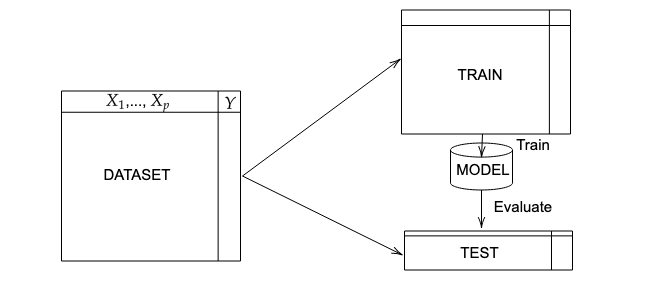

**3. Optimisation des hyperparamètres:**

Une fois notre modèle entraîné (notre $\hat{\theta}$ trouvé) et évalué, on s'intéresse à l'optimisation de $\alpha$. Cette partie là fera l'objet du TD 3 : c'est en effet la clé de voûte du travail du data scientist, qui doit en général trouver à la fois le meilleur algorithme et les meilleurs hyperparamètres pour un algorithme donné. 




Dans ce premier TD, on verra comment entraîner et évaluer des modèles de classification avec scikit-learn. On verra essentiellement la régression logistique et l'algorithme des plus proches voisins. Dans le prochain TD, on détaillera d'abord les fonctions de perte et les métriques intéressantes puis on s'attaquera à un problème de régression, avec des arbres de décision et des forêts aléatoires. En TD3, on abordera les thématiques du boosting et d'optimisation des hyperparamètres. Enfin, dans le dernier TD, on fera une introduction au deep learning, que l'on appliquera sur des données textuelles. 




## 2. Consignes

Ces consignes s'inspirent et suivent le sujet du TD1 : http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td2a_enonce_cl_reg_anomaly.html#td2aenonceclreganomalyrst


1. Télécharger et ouvrir avec pandas le dataset disponible ici : https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/data/data_2a/wines-quality.csv

2. Faire un peu de visualisation, et montrer l'histogramme de répartition des notes des vins. 

3. Séparer le dataset en train et en test. Est-ce que la répartition des notes varie entre le train et le test? Par rapport au dataset d'origine? Comment faire une séparation équilibrée? 

4. Quelle est la nature de chacune des features? Que remarquez vous? Adapter le dataset en fonction.

5. Entraîner un premier classifieur avec scikit-learn : une régression logistique

6. Evaluer avec scikit-learn et avec les métriques adaptées à la classification les performances de la régression logistique. 


###  1. Télécharger et ouvrir avec pandas le dataset disponible ici : https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/data/data_2a/wines-quality.csv

- Si vous avez cloné ce repo github, vous avez déjà le fichier, vous pouvez vous contenter de faire:



In [ ]:
import pandas as pd
df = pd.read_csv('./data/wines-quality.csv')